<a href="https://colab.research.google.com/github/cryingjin/Today-I-learned/blob/master/Load_image_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch로 포켓몬 이미지 로드하기  
0721

0721  conda 파이토치 가상환경에 파이토치 설치함  
0721 torchvision 등등도 가상환경 pytorch에 설치

## Ref  
keras : https://rfriend.tistory.com/431  
pytorch :  
https://ndb796.tistory.com/372  
https://blog.naver.com/reisei11/221733757476  
이미지 imshow  https://hulk89.github.io/pytorch/2017/11/23/pytorch-image-loader/  
pytorch 공식 문서 :  https://tutorials.pytorch.kr/beginner/data_loading_tutorial.html


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/T-I-L

/content/drive/My Drive/T-I-L


In [1]:
# ready
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# 경고 메시지 무시하기
import warnings
warnings.filterwarnings("ignore")

In [22]:
# transform 사용하여 image data compose하기
# torchvision 안에 transforms 안에 Compose 클래스?가 이미지를 tensor로 바꿔줌
trans = transforms.Compose([
    #transforms.Resize(224,224),     # resize 잘못 설정해서 에러났었음
    transforms.ToTensor()])
    #transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])     # 그냥 아무거나 설정

In [ ]:
# path 설정
'''
import os    # directory와 path 관리
import shutil    # 파일을 source에서 destination 경로로 복사

base_dir = '/C:/Users/User/Desktop/Dev/2020_Summer_Study/DL'
img_dir = '/pokemon/images'
'''

In [23]:
# ImageFolder를 이용해 dataload 하기
dataset = torchvision.datasets.ImageFolder(root='./pokemon', transform=trans)

# image dataload path error 참고 https://stackoverflow.com/questions/54613573/runtimeerror-found-0-files-in-subfolders-of-error-about-subfolder-in-pytor

In [9]:
len(dataset)     # 809개~

809

In [24]:
# DataLoader로 dataset을 batch image로 불러오기
dataloader = DataLoader(dataset = dataset, batch_size=8, shuffle=True, num_workers=2)

In [7]:
for i, data in enumerate(dataloader):
    print(data[0].size())      # input image
    print(data[1])             # class label

torch.Size([8, 3, 120, 120])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([8, 3, 120, 120])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([8, 3, 120, 120])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([8, 3, 120, 120])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([8, 3, 120, 120])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([8, 3, 120, 120])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([8, 3, 120, 120])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([8, 3, 120, 120])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([8, 3, 120, 120])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([8, 3, 120, 120])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([8, 3, 120, 120])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([8, 3, 120, 120])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([8, 3, 120, 120])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([8, 3, 120, 120])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([8, 3, 120, 120])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([8, 3, 120, 120])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
torch.Si

뭐가 나온건지 잘 모르겠다! input size가 8,3,120,120 인것은 확실히 알겠다!

기본적으로 PyTorch는 이미지 데이터셋을 [Batch Size, Channel, Width, Height] 순서대로 저장하기 때문에, 이를 matplotlib로 출력하기 위해서는 각 이미지를 [Width, Height, Channel] 형태로 변경해 줄 필요가 있다. 그것은 numpy 라이브러리의 transpose() 함수를 이용하여 해결할 수 있다.

출처: https://ndb796.tistory.com/372 [안경잡이개발자]

torch.Size([3, 120, 120])
max: 1.0, min: 0.0


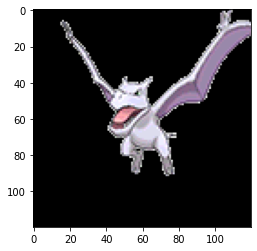

In [25]:
%matplotlib inline
from torchvision.transforms import ToPILImage
to_img = ToPILImage()

for i, data in enumerate(dataloader):
    img = data[0][0,:]
    break
print(img.size())
print("max: {}, min: {}".format(np.max(img.numpy()), np.min(img.numpy())))
plt.imshow(to_img(img))

이미지 잘 나옴~  

torch.Size([3, 120, 120])


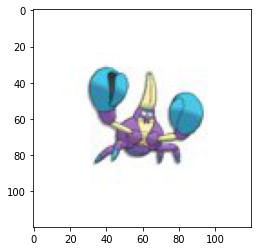

In [26]:
%matplotlib inline
from torchvision.transforms import ToPILImage
to_img = ToPILImage()

for i, data in enumerate(dataloader):
    img = data[0][7,:]
    break
print(img.size())
plt.imshow(to_img(img))

낼할꺼 : 개미 vs 벌 분류기  
http://blog.naver.com/PostView.nhn?blogId=sw4r&logNo=221734454450&categoryNo=0&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView